In [1]:
#import required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data set
df = pd.read_csv('yield_df.csv')

#view the part of data set
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
#delete unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
#view dataset after deleting
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
#view the no. of rows and columns of the data set
df.shape

(28242, 7)

In [6]:
#check for null values
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
#check the structure of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
#check for duplicates
df.duplicated().sum()

2310

In [9]:
#delete duplicates
df.drop_duplicates(inplace=True)

In [10]:
#after deleting duplicates - checking
df.duplicated().sum()

0

In [11]:
df.shape

(25932, 7)

In [12]:
#statistics of the dataset
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [13]:
#function to drop float rain fall values
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [14]:
df=df.drop(to_drop)

In [15]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [16]:
#Train / Test Splitting

col=['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[col]

In [17]:
X=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(20745, 6)

In [21]:
X_test.shape

(5187, 6)

In [22]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652.0,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240.0,98328.63,27.51,Colombia,Maize
28212,2010,657.0,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410.0,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854.0,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537.0,36572.75,7.85,Canada,Wheat
860,1991,534.0,17866.00,18.73,Australia,Potatoes
17223,1998,250.0,6416.14,6.94,Kazakhstan,Potatoes


In [23]:
X_test

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
345,2010,1010.0,40.00,24.44,Angola,Cassava
26405,2006,1622.0,41220.00,27.92,Thailand,Soybeans
27032,2010,593.0,38554.69,13.80,Turkey,Maize
24736,1996,495.0,19508.00,15.23,South Africa,Sorghum
6053,2010,537.0,61050.00,9.47,Canada,Wheat
...,...,...,...,...,...,...
19986,2006,758.0,50891.95,20.30,Mexico,Sweet potatoes
6994,2004,1113.0,2174.00,10.06,Croatia,Wheat
27921,1995,1020.0,716.00,21.86,Zambia,Wheat
13777,2009,1083.0,28707.01,27.82,India,Sorghum


In [24]:
#converting catogorial variables to numericals and standardizing the values (scaling) [Area and item]

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [25]:
ohe=OneHotEncoder(drop='first')
scaler=StandardScaler()

In [26]:
X_train.head(1)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum


In [27]:
preprocesser=ColumnTransformer(
transformers=[
    ('onehotencoder',ohe,[4,5]),
    ('standrization',scaler,[0,1,2,3])
],
remainder='passthrough'
)

In [28]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standrization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [29]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [30]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

In [31]:
#preprocesser.get_feature_names_out(col[:-1])

Model Performance:
lr: MAE = 29920.76772759973, R-squared = 0.7486566921716169


C:\Users\A RAHUL KRISHNAN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910886.82422, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss: MAE = 29907.604370717865, R-squared = 0.7485842229351424
Rid: MAE = 29875.554989429012, R-squared = 0.7485421391285694
Dtr: MAE = 4134.539039907461, R-squared = 0.9764334639960934


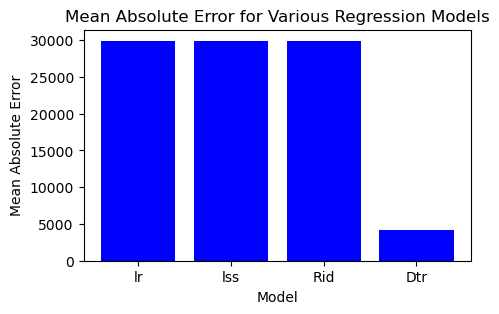

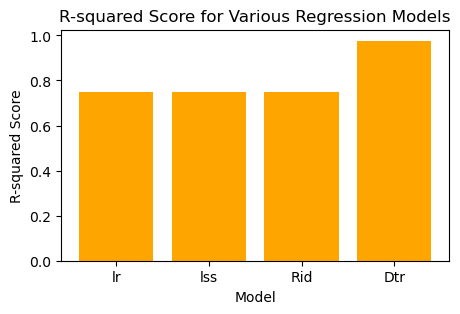

In [32]:
# Train and evaluate each model

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'Rid': Ridge(),
    'Dtr': DecisionTreeRegressor()
}

mae_scores = []
r2_scores = []

print("Model Performance:")
for name, md in models.items():
    md.fit(X_train_dummy, y_train)
    y_pred = md.predict(X_test_dummy)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mae_scores.append(mae)
    r2_scores.append(r2)
    
    print(f"{name}: MAE = {mae}, R-squared = {r2}")

# Plotting Mean Absolute Error (MAE) for each model
plt.figure(figsize=(5, 3))
plt.bar(models.keys(), mae_scores, color='blue')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Various Regression Models')
plt.show()

# Plotting R-squared Score for each model
plt.figure(figsize=(5, 3))
plt.bar(models.keys(), r2_scores, color='orange')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Various Regression Models')
plt.show()

In [33]:
#select model

dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([167489.,  15838.,  72614., ...,  52692.,   9621., 132600.])

In [34]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

C:\Users\A RAHUL KRISHNAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\A RAHUL KRISHNAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
result

array([36613.])

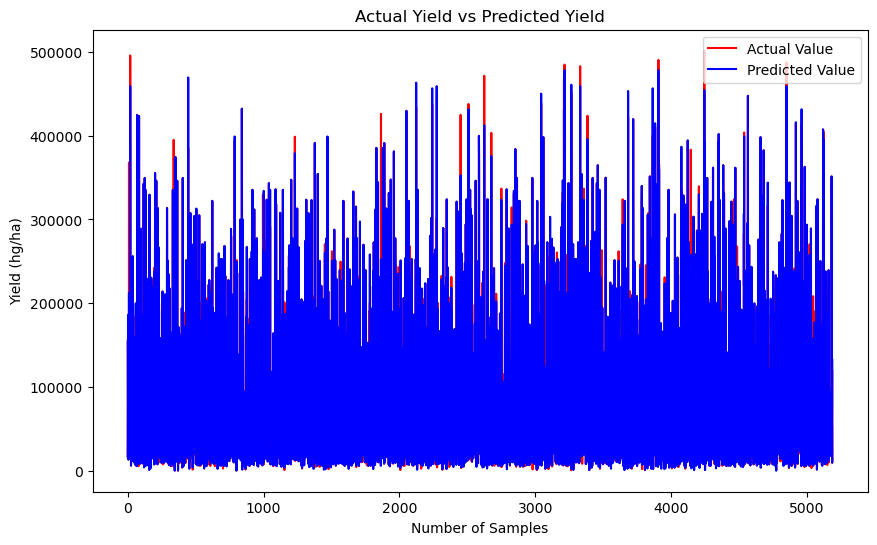

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, color='red', label='Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Actual Yield vs Predicted Yield')
plt.xlabel('Number of Samples')
plt.ylabel('Yield (hg/ha)')
plt.legend()
plt.show()

In [37]:
#pickles

import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocesser.pkl','wb'))

In [38]:
import sklearn
print(sklearn.__version__)

1.3.0


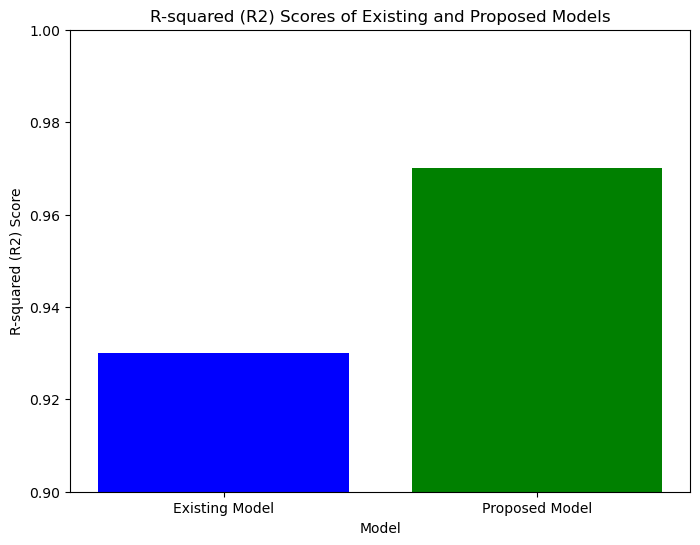

In [39]:
import matplotlib.pyplot as plt

# R2 scores
existing_model_r2 = 0.93
proposed_model_r2 = 0.97

# Model names
model_names = ['Existing Model', 'Proposed Model']

# R2 scores
r2_scores = [existing_model_r2, proposed_model_r2]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green'])
plt.title('R-squared (R2) Scores of Existing and Proposed Models')
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.ylim(0.9, 1)  # Setting y-axis limits for better visualization
plt.show()